In [37]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt


We want to solve the pendulum equation:

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin\theta
$$

And we do this by rewriting it as two first-order equations:

$$
\frac{d\theta}{dx} = \omega,\quad \frac{d\omega}{dx} = -\sin\theta
$$

In [53]:
def midpoint(f, t, y, dt):
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    return y + dt * k2

def euler(f, t, y, dt):
    return y + dt * f(t, y)

def rk4(f, t, y, dt):
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    k3 = f(t + dt/2, y + dt/2 * k2)
    k4 = f(t + dt, y + dt * k3)
    return y + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# def leapfrog(f, t, th, omega, dt, first_step=False):
#     if first_step:
#         omega = omega + dt/2 * f(t, th, omega)
#     th = th + dt * omega
#     omega = omega + dt * f(t, th, omega)
#     return th, omega
def leapfrog(f, t, y, dt):
    y[1] = y[1] - dt/2 * np.sin(y[0])
    y[0] = y[0] + dt * y[1]
    y[1] = y[1] - dt/2 * np.sin(y[0])
    return y
    
def f(t, y):
    return np.array([y[1], -np.sin(y[0])])

def f2(t, th, omega):
    return -np.sin(th)

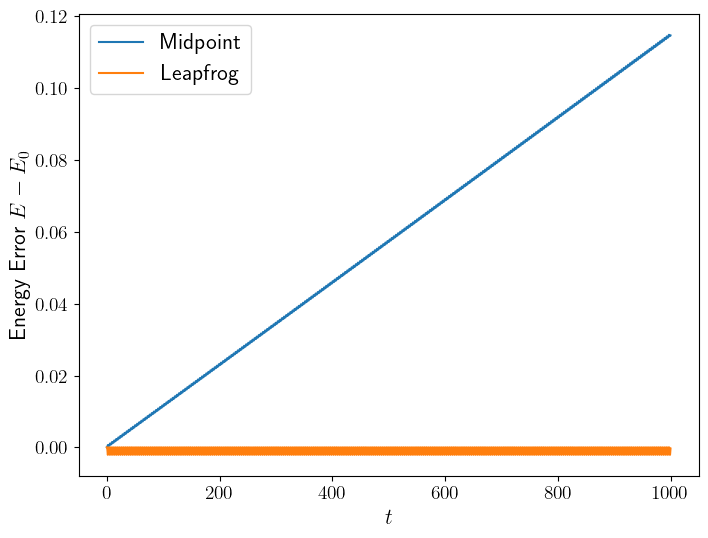

In [66]:
N = 10000

results_midpoint = np.zeros(N)
results_leapfrog = np.zeros(N)
results_euler = np.zeros(N)
results_rk4 = np.zeros(N)

omega_midpoint = np.zeros(N)
omega_leapfrog = np.zeros(N)
omega_euler = np.zeros(N)
omega_rk4 = np.zeros(N)

energy_midpoint = np.zeros(N)
energy_leapfrog = np.zeros(N)
energy_euler = np.zeros(N)
energy_rk4 = np.zeros(N)

th0 = np.pi / 2.0
omega0 = 0.0
y0 = np.array([th0, omega0])
y = y0
y_euler = y0
y_rk4 = y0
y_leapfrog = y0
th = th0
omega = omega0

results_midpoint[0] = th0
results_leapfrog[0] = th0
results_euler[0] = th0
dt = 0.1
t = 0.0
ts = t + np.arange(0, N) * dt

fig = plt.figure()
fig.set_size_inches(8, 6)

for i in range(0, N):
    y = midpoint(f, t, y, dt)
    results_midpoint[i] = y[0]
    omega_midpoint[i] = y[1]
    energy_midpoint[i] = 0.5 * y[1]**2 + 1.0 - np.cos(y[0])

    y_euler = euler(f, t, y_euler, dt)
    results_euler[i] = y_euler[0]
    omega_euler[i] = y_euler[1]
    # y = y_euler
    energy_euler[i] = 0.5 * y_euler[1]**2 + 1.0 - np.cos(y_euler[0])

    y_rk4 = rk4(f, t, y_rk4, dt)
    results_rk4[i] = y_rk4[0]
    omega_rk4[i] = y_rk4[1]
    energy_rk4[i] = 0.5 * y_rk4[1]**2 + 1.0 - np.cos(y_rk4[0])

    y_leapfrog = leapfrog(f, t, y_leapfrog, dt)
    results_leapfrog[i] = y_leapfrog[0]
    omega_leapfrog[i] = y_leapfrog[1]
    energy_leapfrog[i] = 0.5 * y_leapfrog[1]**2 + 1.0 - np.cos(y_leapfrog[0])
    # y_leapfrog = leapfrog(f2, t, th, omega, dt, i == 0)
    # results_leapfrog[i] = y_leapfrog[0]
    # th, omega = y_leapfrog
    # energy_leapfrog[i] = 0.5 * omega**2 + 1.0 - np.cos(th)

    t += dt

e0 = 0.5 * omega0**2 + 1.0 - np.cos(th0)
plt.plot(ts, energy_midpoint - e0, label='Midpoint')
plt.plot(ts, energy_leapfrog - e0, label='Leapfrog')
# plt.plot(ts, energy_euler - e0, label='Euler')
# plt.plot(ts, energy_rk4 - e0, label='RK4')

ax = plt.gca()
# ax.set_ylim()
# ax.set_yscale('symlog', linthresh=1e-6)
plt.legend(fontsize=16)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('Energy Error $E - E_0$', fontsize=16)
ax.tick_params(labelsize=14)
# plt.show()

(-2.5, 2.5)

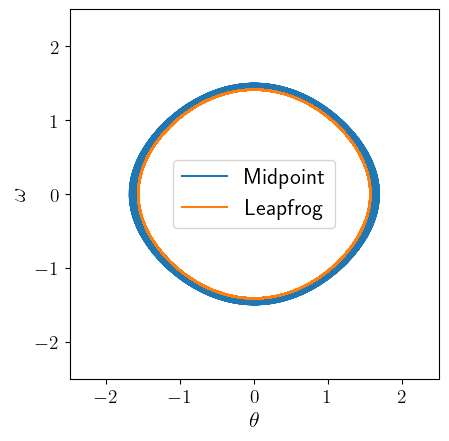

In [67]:
plt.plot(results_midpoint, omega_midpoint, label='Midpoint')
plt.plot(results_leapfrog, omega_leapfrog, label='Leapfrog')
# plt.plot(results_euler, omega_euler, label='Euler')
# plt.plot(results_rk4, omega_rk4, label='RK4')
plt.legend(fontsize=16)
# plt.show()
ax = plt.gca()
ax.set_xlabel('$\\theta$', fontsize=16)
ax.set_ylabel('$\\omega$', fontsize=16)
ax.tick_params(labelsize=14)
ax.set_aspect('equal')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
# plt.show()


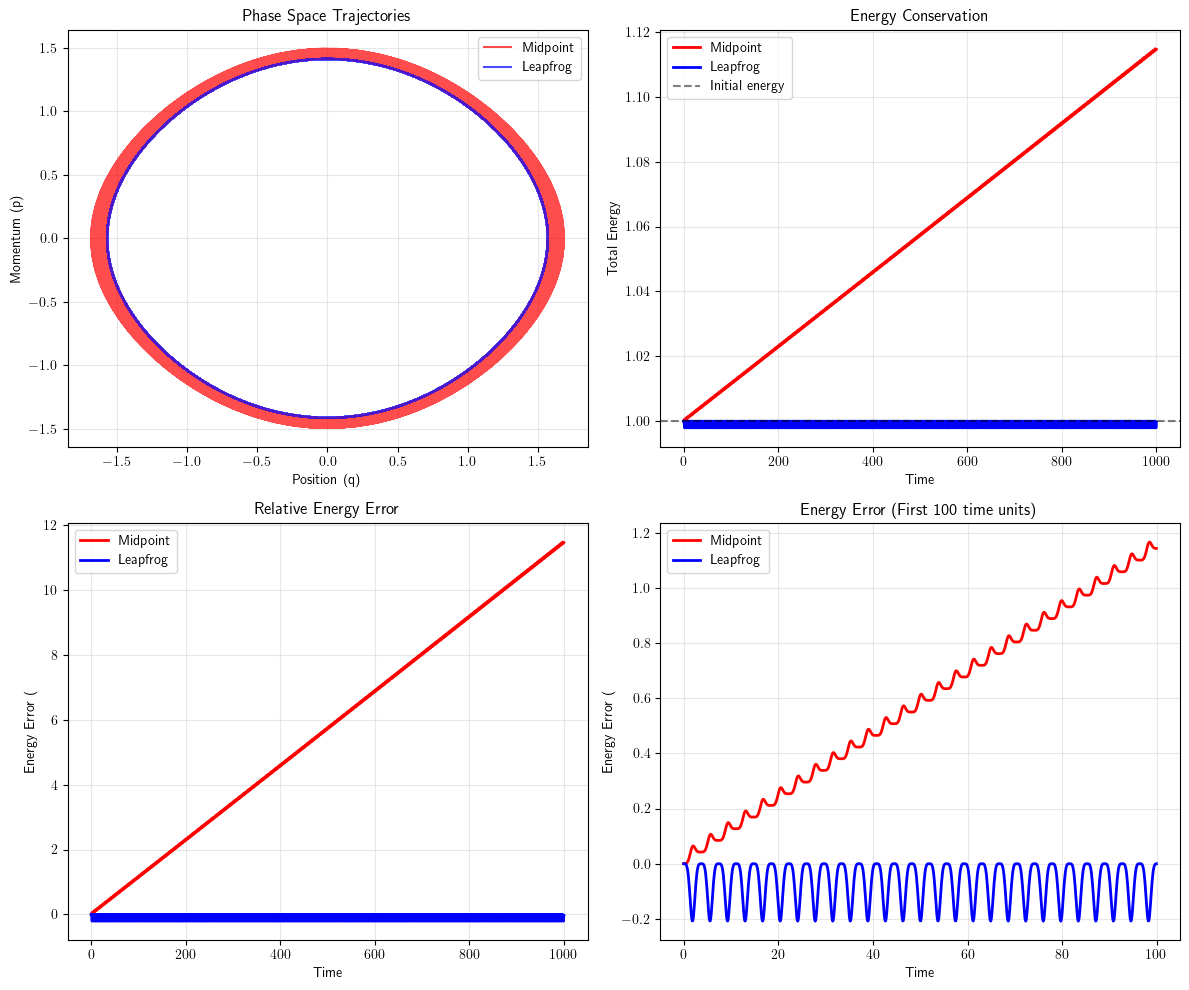

Energy Conservation Analysis
Initial energy: 1.000000

Midpoint Method:
  Final energy: 1.114687
  Energy drift: 0.114687
  Relative error: 11.47%
  Max absolute error: 11.49%

Leapfrog Method:
  Final energy: 0.999661
  Energy drift: -0.000339
  Relative error: -0.033894%
  Max absolute error: 0.208375%


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hamiltonian system: Nonlinear pendulum
# H = p²/2 + (1 - cos(q))
# This gives us:
# dq/dt = ∂H/∂p = p
# dp/dt = -∂H/∂q = -sin(q)

def hamiltonian(q, p):
    """Compute the Hamiltonian (total energy) of the system"""
    return 0.5 * p**2 + (1 - np.cos(q))

def derivatives(q, p):
    """Compute derivatives for the nonlinear pendulum"""
    dq_dt = p
    dp_dt = -np.sin(q)
    return dq_dt, dp_dt

def midpoint_step(q, p, dt):
    """2nd order explicit midpoint method (RK2)"""
    # Compute derivatives at current point
    dq_dt, dp_dt = derivatives(q, p)
    
    # Compute midpoint
    q_mid = q + 0.5 * dt * dq_dt
    p_mid = p + 0.5 * dt * dp_dt
    
    # Compute derivatives at midpoint
    dq_dt_mid, dp_dt_mid = derivatives(q_mid, p_mid)
    
    # Update using midpoint derivatives
    q_new = q + dt * dq_dt_mid
    p_new = p + dt * dp_dt_mid
    
    return q_new, p_new

def leapfrog_step(q, p, dt):
    """Leapfrog (Störmer-Verlet) method"""
    # Half step for momentum
    p_half = p - 0.5 * dt * np.sin(q)
    
    # Full step for position
    q_new = q + dt * p_half
    
    # Half step for momentum
    p_new = p_half - 0.5 * dt * np.sin(q_new)
    
    return q_new, p_new

# Simulation parameters
dt = 0.1  # Time step
T = 1000  # Total simulation time
n_steps = int(T / dt)

# Initial conditions (large amplitude oscillation)
q0 = np.pi / 2  # Initial angle
p0 = 0.0        # Initial momentum

# Initialize arrays for storing results
time = np.linspace(0, T, n_steps + 1)
q_midpoint = np.zeros(n_steps + 1)
p_midpoint = np.zeros(n_steps + 1)
q_leapfrog = np.zeros(n_steps + 1)
p_leapfrog = np.zeros(n_steps + 1)
energy_midpoint = np.zeros(n_steps + 1)
energy_leapfrog = np.zeros(n_steps + 1)

# Set initial conditions
q_midpoint[0] = q0
p_midpoint[0] = p0
q_leapfrog[0] = q0
p_leapfrog[0] = p0
energy_midpoint[0] = hamiltonian(q0, p0)
energy_leapfrog[0] = hamiltonian(q0, p0)

# Run simulations
for i in range(n_steps):
    # Midpoint method
    q_midpoint[i+1], p_midpoint[i+1] = midpoint_step(q_midpoint[i], p_midpoint[i], dt)
    energy_midpoint[i+1] = hamiltonian(q_midpoint[i+1], p_midpoint[i+1])
    
    # Leapfrog method
    q_leapfrog[i+1], p_leapfrog[i+1] = leapfrog_step(q_leapfrog[i], p_leapfrog[i], dt)
    energy_leapfrog[i+1] = hamiltonian(q_leapfrog[i+1], p_leapfrog[i+1])

# Compute energy errors
initial_energy = hamiltonian(q0, p0)
energy_error_midpoint = (energy_midpoint - initial_energy) / initial_energy * 100
energy_error_leapfrog = (energy_leapfrog - initial_energy) / initial_energy * 100

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Phase space plots
ax1 = axes[0, 0]
ax1.plot(q_midpoint, p_midpoint, 'r-', alpha=0.7, label='Midpoint')
ax1.plot(q_leapfrog, p_leapfrog, 'b-', alpha=0.7, label='Leapfrog')
ax1.set_xlabel('Position (q)')
ax1.set_ylabel('Momentum (p)')
ax1.set_title('Phase Space Trajectories')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Energy over time
ax2 = axes[0, 1]
ax2.plot(time, energy_midpoint, 'r-', label='Midpoint', linewidth=2)
ax2.plot(time, energy_leapfrog, 'b-', label='Leapfrog', linewidth=2)
ax2.axhline(y=initial_energy, color='k', linestyle='--', alpha=0.5, label='Initial energy')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Energy')
ax2.set_title('Energy Conservation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Energy error over time (percentage)
ax3 = axes[1, 0]
ax3.plot(time, energy_error_midpoint, 'r-', label='Midpoint', linewidth=2)
ax3.plot(time, energy_error_leapfrog, 'b-', label='Leapfrog', linewidth=2)
ax3.set_xlabel('Time')
ax3.set_ylabel('Energy Error (%)')
ax3.set_title('Relative Energy Error')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Close-up of energy error
ax4 = axes[1, 1]
ax4.plot(time[:1000], energy_error_midpoint[:1000], 'r-', label='Midpoint', linewidth=2)
ax4.plot(time[:1000], energy_error_leapfrog[:1000], 'b-', label='Leapfrog', linewidth=2)
ax4.set_xlabel('Time')
ax4.set_ylabel('Energy Error (%)')
ax4.set_title('Energy Error (First 100 time units)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Energy Conservation Analysis")
print("=" * 40)
print(f"Initial energy: {initial_energy:.6f}")
print(f"\nMidpoint Method:")
print(f"  Final energy: {energy_midpoint[-1]:.6f}")
print(f"  Energy drift: {energy_midpoint[-1] - initial_energy:.6f}")
print(f"  Relative error: {energy_error_midpoint[-1]:.2f}%")
print(f"  Max absolute error: {np.max(np.abs(energy_error_midpoint)):.2f}%")
print(f"\nLeapfrog Method:")
print(f"  Final energy: {energy_leapfrog[-1]:.6f}")
print(f"  Energy drift: {energy_leapfrog[-1] - initial_energy:.6f}")
print(f"  Relative error: {energy_error_leapfrog[-1]:.6f}%")
print(f"  Max absolute error: {np.max(np.abs(energy_error_leapfrog)):.6f}%")